In [1]:
import pandas as pd; import numpy as np

In [16]:
#anahtar1 ve 2 , key columns 
vs = pd.DataFrame({"anahtar1":list("aabbab"),
                   "anahtar2":["bir","iki","uc"]*2,
                   "veri1":np.random.randn(6),
                   "veri2":np.random.randn(6)})
vs
                   
                   

,anahtar1,anahtar2,veri1,veri2
0,a,bir,0.235859,-1.028019
1,a,iki,-1.420051,0.828964
2,b,uc,-0.236428,0.114586
3,b,bir,0.178512,-0.711395
4,a,iki,1.007834,0.693301
5,b,uc,-0.469738,-1.209815


In [7]:
#veri1in ortalamasini, a ve b olarak(anahtar1 verileri gruplandirdik)
grup = vs["veri1"].groupby(vs["anahtar1"])
grup

In [6]:
#bu gruplandirmanin ortalamsi 
grup.mean()

anahtar1
a   -1.334703
b    1.054422
Name: veri1, dtype: float64

In [11]:
#veri1in hem anahtar1 hem anahtar2 cinsinden ortalamalari 
ort = vs["veri1"].groupby([vs["anahtar1"],vs["anahtar2"]]).mean()
ort

anahtar1  anahtar2
a         bir        -0.921980
          iki        -1.541064
b         bir         0.831237
          uc          1.166014
Name: veri1, dtype: float64

In [14]:
#tablo olarak gorelim
ort.unstack()

anahtar2,bir,iki,uc
anahtar1,,,
a,-0.921980,-1.541064,NaN
b,0.831237,NaN,1.166014


In [22]:
ort2 = vs.groupby(["anahtar1","anahtar2"]).mean()
ort2

veri1     veri2
anahtar1 anahtar2                    
a        bir       0.235859 -1.028019
         iki      -0.206108  0.761133
b        bir       0.178512 -0.711395
         uc       -0.353083 -0.547614

In [23]:
for isim, grup in vs.groupby("anahtar1"):
    print(isim)
    print(grup)

a
  anahtar1 anahtar2     veri1     veri2
0        a      bir  0.235859 -1.028019
1        a      iki -1.420051  0.828964
4        a      iki  1.007834  0.693301
b
  anahtar1 anahtar2     veri1     veri2
2        b       uc -0.236428  0.114586
3        b      bir  0.178512 -0.711395
5        b       uc -0.469738 -1.209815


In [24]:
for (x1,x2), grup in vs.groupby(["anahtar1","anahtar2"]):
    print(x1,x2)
    print(grup)

a bir
  anahtar1 anahtar2     veri1     veri2
0        a      bir  0.235859 -1.028019
a iki
  anahtar1 anahtar2     veri1     veri2
1        a      iki -1.420051  0.828964
4        a      iki  1.007834  0.693301
b bir
  anahtar1 anahtar2     veri1     veri2
3        b      bir  0.178512 -0.711395
b uc
  anahtar1 anahtar2     veri1     veri2
2        b       uc -0.236428  0.114586
5        b       uc -0.469738 -1.209815


In [26]:
#ayrica gruoby ole parcalama islemi de yapabiliriz
parca = dict(list(vs.groupby("anahtar1")))
parca["a"]

,anahtar1,anahtar2,veri1,veri2
0,a,bir,0.235859,-1.028019
1,a,iki,-1.420051,0.828964
4,a,iki,1.007834,0.693301


In [30]:
oyun = pd.read_csv("DataSets/vgsales.csv")
oyun.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [31]:
oyun.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [32]:
#NaN degerleri silip, aciklamari okuyalim
oyun.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000
mean,8288.826805,2006.403364,0.265696,0.147758,0.078845,0.048435,0.541007
std,4792.026255,5.830172,0.822500,0.509346,0.311907,0.190099,1.567473
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8290.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [33]:
#bir satirin ortalamasini bulalim 
oyun.Global_Sales.mean()

0.5403277382994364

In [38]:
#oyun turune gore gruba alalim once
grup = oyun.groupby("Genre")
grup

In [39]:
#dunyada hangi title ne kadar sarmis 
grup["Global_Sales"].count()

Genre
Action          3252
Adventure       1276
Fighting         836
Misc            1710
Platform         876
Puzzle           571
Racing          1226
Role-Playing    1469
Shooter         1282
Simulation       851
Sports          2304
Strategy         671
Name: Global_Sales, dtype: int64

In [40]:
grup["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3252.0,0.529788,1.165092,0.01,0.07,0.19,0.5000,21.40
Adventure,1276.0,0.184013,0.510522,0.01,0.02,0.06,0.1600,11.18
Fighting,836.0,0.531160,0.957915,0.01,0.08,0.21,0.5500,13.04
Misc,1710.0,0.466444,1.323298,0.01,0.06,0.16,0.4100,29.02
Platform,876.0,0.946518,2.598642,0.01,0.09,0.28,0.8125,40.24
Puzzle,571.0,0.424203,1.576276,0.01,0.04,0.10,0.3000,30.26
Racing,1226.0,0.592798,1.676771,0.01,0.07,0.19,0.5300,35.82
Role-Playing,1469.0,0.628863,1.717965,0.01,0.07,0.19,0.5300,31.37
Shooter,1282.0,0.800468,1.833578,0.01,0.08,0.23,0.7400,28.31


In [43]:
grp = grup.mean("Global_Sales")
grp

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7985.865621,2007.907134,0.265006,0.158819,0.048785,0.056863,0.529788
Adventure,11542.369906,2008.130878,0.079984,0.049992,0.040760,0.013088,0.184013
Fighting,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531160
Misc,8549.790643,2007.258480,0.235368,0.125041,0.062380,0.043287,0.466444
Platform,6889.267123,2003.820776,0.509121,0.229075,0.149144,0.058801,0.946518
Puzzle,9655.485114,2005.243433,0.213678,0.088494,0.099264,0.021839,0.424203
Racing,7924.856444,2004.840131,0.291134,0.192757,0.046175,0.062545,0.592798
Role-Playing,8050.490810,2007.046971,0.222260,0.127692,0.238428,0.040422,0.628863
Shooter,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468


In [49]:
%matplotlib inline

<Axes: xlabel='Genre'>

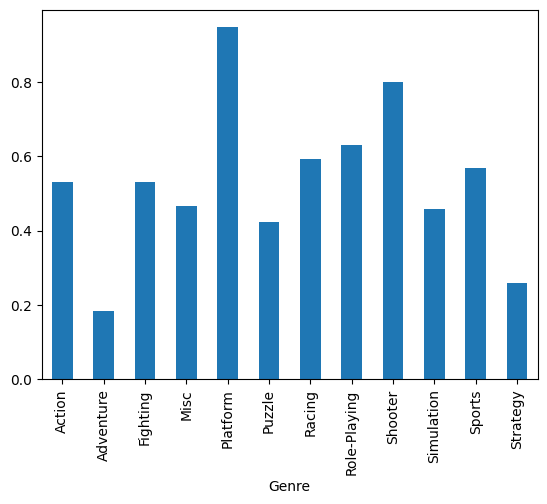

In [56]:
grup["Global_Sales"].mean().plot(kind="bar")

In [57]:
#grouping
meyve = pd.DataFrame(np.random.randn(4,4),
                     columns = list("abcd"),
                     index = ["elma","kiraz","muz","kiwi"])
meyve

,a,b,c,d
elma,0.883097,0.435511,-0.044128,-0.725948
kiraz,-2.806440,-2.483946,-1.110906,0.699247
muz,-0.097484,0.092669,0.409149,0.083626
kiwi,-0.130737,-0.276989,-0.088701,0.807832


In [58]:
etiket = {"a":"yesil","b":"sari","c":"yesil","d":"sari","e":"mor"}

In [65]:
#bu iki veriyi gruplandiracagiz
#satirlar otomatik geldiginden, onu axis=1 ile sutuna cevirecdegiz 
grup = meyve.groupby(etiket, axis =1 )

C:\Users\ugulb\AppData\Local\Temp\ipykernel_21804\3911895315.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grup = meyve.groupby(etiket, axis =1 )


In [66]:
#grup sari ve yesile gore gruplandi ve her bir veri icin toplamlar bulundu
grup.sum()

,sari,yesil
elma,-0.290437,0.838969
kiraz,-1.784699,-3.917346
muz,0.176295,0.311665
kiwi,0.530843,-0.219438


In [69]:
#meyvelerin harf sayilarina ggore toplamlari yazdi 
#3 dedigi muz , 4 dedigi elma ve kiwi 54 dedigi kiraz, bunlar boyle gruplandi
meyve.groupby(len).sum()

,a,b,c,d
3,-0.097484,0.092669,0.409149,0.083626
4,0.752360,0.158522,-0.132829,0.081884
5,-2.806440,-2.483946,-1.110906,0.699247


In [71]:
veri = pd.DataFrame(np.random.randn(4,5),
                    columns = [list("AAABB"),[1,2,3,1,2]])
veri.columns.names=["harf", "sayi"]
veri

harf         A                             B          
sayi         1         2         3         1         2
0    -0.120443 -1.436181  1.173389  1.442410  0.945702
1    -1.573671 -0.004864  1.002598  1.618905 -0.446919
2     0.344780  1.127490 -0.580113 -0.164590 -0.831430
3    -0.164491  1.500238  1.812532  0.235064 -0.544397

In [72]:
#bu veriyi harf indexine gore gruplandiralim
veri.groupby(level="harf",axis=1).sum()

C:\Users\ugulb\AppData\Local\Temp\ipykernel_21804\918599438.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  veri.groupby(level="harf",axis=1).sum()


harf,A,B
0,-0.383235,2.388113
1,-0.575937,1.171986
2,0.892157,-0.996021
3,3.148280,-0.309333


In [73]:
oyun = pd.read_csv("DataSets/vgsales.csv")
oyun.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [75]:
#sayisal deger icin describe 
oyun.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [76]:
oyun.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000
mean,8288.826805,2006.403364,0.265696,0.147758,0.078845,0.048435,0.541007
std,4792.026255,5.830172,0.822500,0.509346,0.311907,0.190099,1.567473
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8290.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [78]:
#global satislarin ortalamasi 
oyun.Global_Sales.mean()


0.5403277382994364

In [79]:
#oyun turune gore gruplandiriyoruz
grup = oyun.groupby("Genre")

In [80]:
#turlere gore global satislara bakalim 
grup["Global_Sales"].count()

Genre
Action          3252
Adventure       1276
Fighting         836
Misc            1710
Platform         876
Puzzle           571
Racing          1226
Role-Playing    1469
Shooter         1282
Simulation       851
Sports          2304
Strategy         671
Name: Global_Sales, dtype: int64

In [81]:
grup["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3252.0,0.529788,1.165092,0.01,0.07,0.19,0.5000,21.40
Adventure,1276.0,0.184013,0.510522,0.01,0.02,0.06,0.1600,11.18
Fighting,836.0,0.531160,0.957915,0.01,0.08,0.21,0.5500,13.04
Misc,1710.0,0.466444,1.323298,0.01,0.06,0.16,0.4100,29.02
Platform,876.0,0.946518,2.598642,0.01,0.09,0.28,0.8125,40.24
Puzzle,571.0,0.424203,1.576276,0.01,0.04,0.10,0.3000,30.26
Racing,1226.0,0.592798,1.676771,0.01,0.07,0.19,0.5300,35.82
Role-Playing,1469.0,0.628863,1.717965,0.01,0.07,0.19,0.5300,31.37
Shooter,1282.0,0.800468,1.833578,0.01,0.08,0.23,0.7400,28.31


In [84]:
#butun sayilar verilerin turlere gore ortalamasini bulmak 
grp = grup.mean("Global_Sales")
grp

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7985.865621,2007.907134,0.265006,0.158819,0.048785,0.056863,0.529788
Adventure,11542.369906,2008.130878,0.079984,0.049992,0.040760,0.013088,0.184013
Fighting,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531160
Misc,8549.790643,2007.258480,0.235368,0.125041,0.062380,0.043287,0.466444
Platform,6889.267123,2003.820776,0.509121,0.229075,0.149144,0.058801,0.946518
Puzzle,9655.485114,2005.243433,0.213678,0.088494,0.099264,0.021839,0.424203
Racing,7924.856444,2004.840131,0.291134,0.192757,0.046175,0.062545,0.592798
Role-Playing,8050.490810,2007.046971,0.222260,0.127692,0.238428,0.040422,0.628863
Shooter,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468


In [85]:
%matplotlib inline

<Axes: xlabel='Genre'>

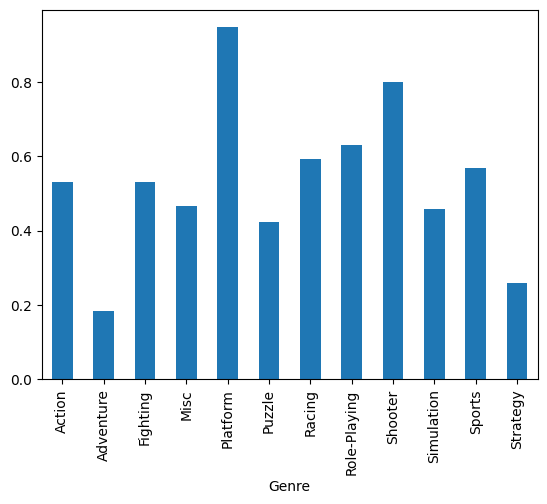

In [86]:
grup["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

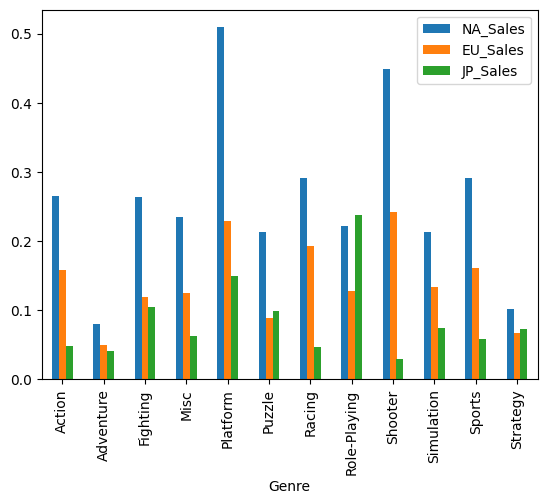

In [91]:
#3 farkli sekilde turune gore satis ortalamalari 
grup[["NA_Sales","EU_Sales","JP_Sales"]].mean().plot(kind="bar")